 # <center>Climate Change Belief Analysis</center>
 ### <center> Advanced Classification Team 7</center>

© Explore Data Science Academy

---




## <center>Introduction</center>


<img src="nice.png" width="700" height="400">

<p style='text-align: justify;'> Climate change is a major issue in the 21st century as evidenced by the high number of studies that forecast doom.
The concern is that if enviromental impact is not taken seriously by governments, corporations, businesses and individuals. Consequently, many companies are built around the notion of reducing environmental impact. The quick response to enviromental concerns is attributed to the fact that the public is increasinlgy lean towards green products. Understanding how the public perceives climate change, and whether or not they believe is a threat is a key issue for many companies. A company that understands how consumers perceive climate change is a good position to present goods and services that are in line with the needs and expectations of its customers. The goal of this project is to create a machine learning model that can classify whether an individual believes in climate change based on their novel tweet data.  </p>



<a id="cont"></a>

## Table of Contents


<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [22]:
# Libraries for data loading, data manipulation and data visulisation
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import string
import re
from sklearn.feature_extraction.text import CountVectorizer

# Set Plot Style
sns.set()

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section, we load the data and preview all the files. The objective is to familiarize with the data |

---

In [4]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
samplesubmission = pd.read_csv('data/sample_submission.csv')

# Preview Train Data
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [3]:
# Preview the Test Data
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [5]:
# Check the Sample Submission File
samplesubmission.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1


In [6]:
print('Dataset size:',df_train.shape)
print('Columns are:',df_train.columns)

Dataset size: (15819, 3)
Columns are: Index(['sentiment', 'message', 'tweetid'], dtype='object')


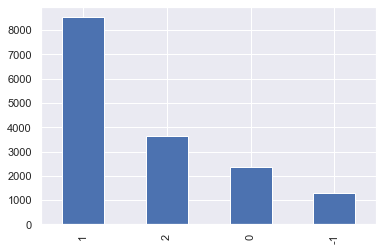

In [26]:
df_train['sentiment'].value_counts().plot(kind='bar')
plt.show()

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


A simple preview of the dataset reveals important information about the shape and size of the dataset. The key things to take into account include:
* The dataset has three features and over 15,000 rows. 
* The two main datatypes are int and object. 
* From a glance, there are no null values in the dataset.

<AxesSubplot:xlabel='sentiment', ylabel='count'>

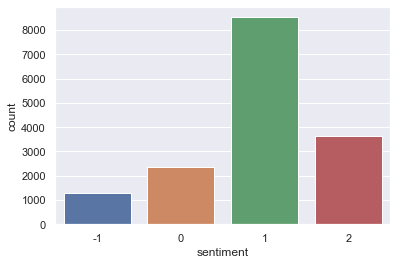

In [12]:
sns.countplot(x = 'sentiment', data = df_train)

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


### Word Cloud Visualisation
Word clouds provide graphical representation of the word frequency. The size of the word in the word cloud increases with increase in frequency. Therefore, the bigger words are the most common the in the text. In this section, we use word cloud to check the words that are most common in the tweet messages based on the sentiments. 
Word cloud can help with the following:
*  Make it easy to see the most common words in the text. 
* The salient themes in the text can be identified to make sense of the text in relation to the objective of the analysis. 


CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs


(-0.5, 399.5, 199.5, -0.5)

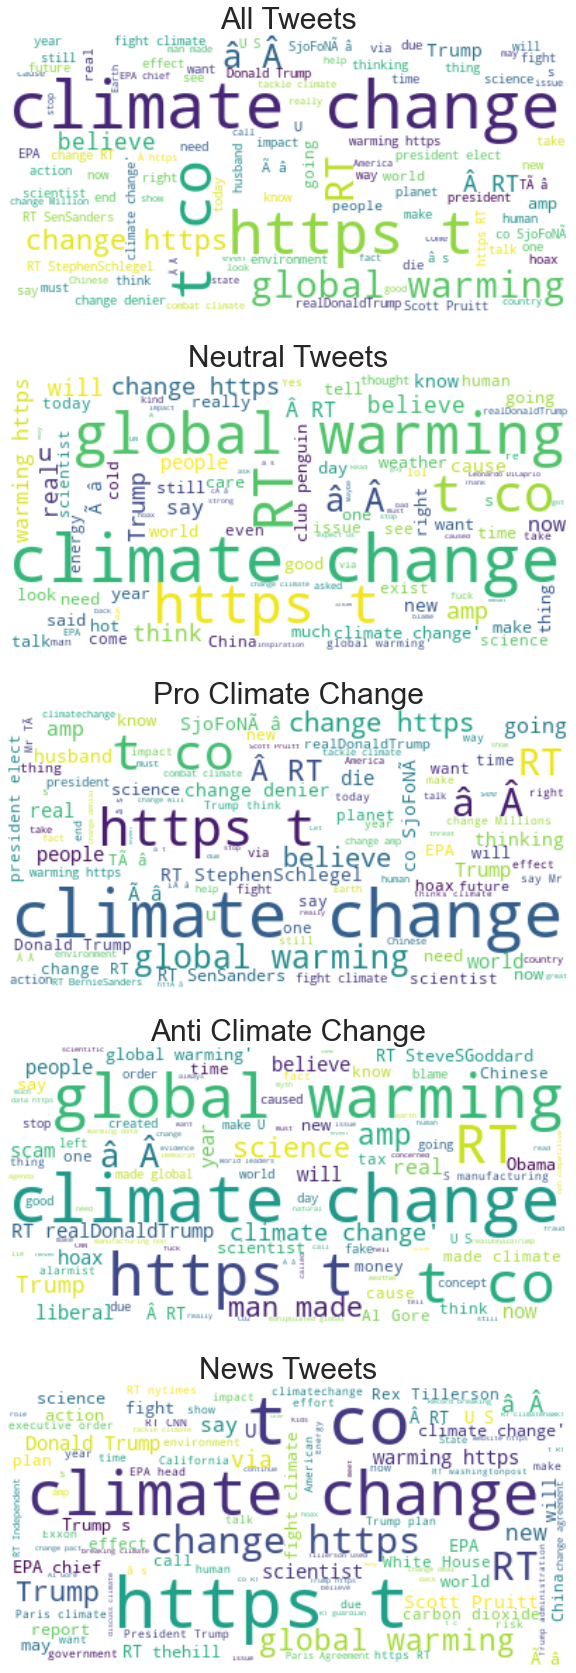

In [27]:
%time
# Create DataFrame for Each Sentiment
df_sent1 = df_train[df_train['sentiment']==1]
df_sent0 = df_train[df_train['sentiment']==0]
df_sentneg = df_train[df_train['sentiment']==-1]
df_sent2 = df_train[df_train['sentiment']==2]

tweet_All = " ".join(review for review in df_train.message)
tweet_sent0 = " ".join(review for review in df_sent0.message)
tweet_sent1 = " ".join(review for review in df_sent1.message)
tweet_sentneg = " ".join(review for review in df_sentneg.message)
tweet_sent2 = " ".join(review for review in df_sent2.message)

fig, ax = plt.subplots(5, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_sent0 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_sent0)
wordcloud_sent1 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_sent1)
wordcloud_sentneg = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_sentneg)
wordcloud_sent2 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_sent2)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_sent0, interpolation='bilinear')
ax[1].set_title('Neutral Tweets',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_sent1, interpolation='bilinear')
ax[2].set_title('Pro Climate Change',fontsize=30)
ax[2].axis('off')
ax[3].imshow(wordcloud_sentneg, interpolation='bilinear')
ax[3].set_title('Anti Climate Change',fontsize=30)
ax[3].axis('off')
ax[4].imshow(wordcloud_sent2, interpolation='bilinear')
ax[4].set_title('News Tweets',fontsize=30)
ax[4].axis('off')

#wordcloud.to_file("img/first_review.png")

Important Takeaways:
* Words like climate change and global warming that appear in all categories. They are general words that are associated with conversations about climate change. 
* The removal of words that appear in all categories and stopwords is likely to have no effect on the performance of the classification model. 
* There is a need to reduce the categories in sentiment feature because the goal is to define whethere there is a positive sentiment or not. 

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

The anticipated steps during Data Engineering:
* The stripping of all punctuation marks in the text. 
* Tokenization - convert all the sentences into a list of words.
* The removal of stopwords because they add not qualitative value to the meaning of the text. 
* Find the root words using stemming or lemmitization based on the data and emerging concerns during data engineering. 

In [21]:
# Create Dataframe for User and Message
df = pd.DataFrame(df_train[['tweetid', 'message']])
df.head()

,tweetid,message
0,625221,PolySciMajor EPA chief doesn't think carbon di...
1,126103,It's not like we lack evidence of anthropogeni...
2,698562,RT @RawStory: Researchers say we have three ye...
3,573736,#TodayinMaker# WIRED : 2016 was a pivotal year...
4,466954,"RT @SoyNovioDeTodas: It's 2016, and a racist, ..."


### Strip Punctuations

In [23]:
# check punctuation characters in punctuation method of string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
# Function to remove the text

def handle_punct(text):
    """ The functution takes a string of text and returns a modified string of text"""
    
    # Make lower case to remove capitalisation noise
    text= text.str.lower()
    
    # Removing all punctuation from the text
    text = "".join([p for p in text if p not in string.punctuation]) 
    
    # Replace all numbers with nothing
    text = re.sub('[0-9]+', '', text)
    
    return text
    
    
# Create a new column with the message without punctuation and numbers
df['Message_punct'] = df['message']. apply(lambda x: handle_punct(x))

df.head(10)

,tweetid,message,Message_punct
0,625221,PolySciMajor EPA chief doesn't think carbon di...,PolySciMajor EPA chief doesnt think carbon dio...
1,126103,It's not like we lack evidence of anthropogeni...,Its not like we lack evidence of anthropogenic...
2,698562,RT @RawStory: Researchers say we have three ye...,RT RawStory Researchers say we have three year...
3,573736,#TodayinMaker# WIRED : 2016 was a pivotal year...,TodayinMaker WIRED was a pivotal year in the...
4,466954,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",RT SoyNovioDeTodas Its and a racist sexist cl...
5,425577,Worth a read whether you do or don't believe i...,Worth a read whether you do or dont believe in...
6,294933,RT @thenation: Mike Pence doesn’t believe in g...,RT thenation Mike Pence doesn’t believe in glo...
7,992717,RT @makeandmendlife: Six big things we can ALL...,RT makeandmendlife Six big things we can ALL d...
8,664510,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,AceofSpadesHQ My yo nephew is inconsolable He ...
9,260471,RT @paigetweedy: no offense… but like… how do ...,RT paigetweedy no offense… but like… how do yo...


### Tokenization

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic